In [ ]:
# ETL Pipeline: Preprocessing, Transformation, and Loading (Pandas + Scikit-Learn)

In [1]:
# STEP 1: INSTALL & IMPORT LIBRARIES
!pip install -q pandas scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
# For saving the output (optional)
import os

In [4]:
# STEP 2: LOAD A SAMPLE DATASET (OR UPLOAD YOUR OWN CSV)
url = "/content/muni.csv"
df = pd.read_csv(url)

In [5]:
print("Shape of Data:", df.shape)
df.head()

Shape of Data: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# STEP 3: EXTRACT FEATURES & TARGET
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])  # drop unnecessary
y = df['Survived']

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
# STEP 4: DEFINE NUMERIC & CATEGORICAL COLUMNS
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [9]:
print("Numeric columns:", numeric_features)
print("Categorical columns:", categorical_features)

Numeric columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical columns: ['Sex', 'Embarked']


In [10]:
# STEP 5: CREATE TRANSFORMATION PIPELINES
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [11]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [13]:
# STEP 6: CREATE FINAL PIPELINE
etl_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [14]:
# STEP 7: APPLY THE PIPELINE TO THE DATA
X_transformed = etl_pipeline.fit_transform(X)

In [15]:
print("Shape before transformation:", X.shape)
print("Shape after transformation:", X_transformed.shape)

Shape before transformation: (891, 7)
Shape after transformation: (891, 10)


In [16]:
# STEP 8: OPTIONAL – CONVERT BACK TO DATAFRAME
encoded_columns = etl_pipeline.named_steps['preprocessor'].transformers_[1][1]                    .named_steps['encoder'].get_feature_names_out(categorical_features)

In [17]:
all_columns = numeric_features + list(encoded_columns)

In [18]:
X_transformed_df = pd.DataFrame(X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed,
                                columns=all_columns)

In [19]:
X_transformed_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [20]:
# STEP 9: OPTIONAL – SAVE THE TRANSFORMED DATA
output_path = "/content/etl_transformed_data.csv"
X_transformed_df.to_csv(output_path, index=False)
print(f"Transformed data saved to: {output_path}")

Transformed data saved to: /content/etl_transformed_data.csv


In [21]:
# STEP 10: SPLIT INTO TRAIN AND TEST SETS
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (712, 10)
Test set: (179, 10)


In [22]:
# STEP 11: TRAIN A MODEL
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
# STEP 12: EVALUATE THE MODEL
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.8100558659217877

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


🧩 Confusion Matrix:
 [[90 15]
 [19 55]]


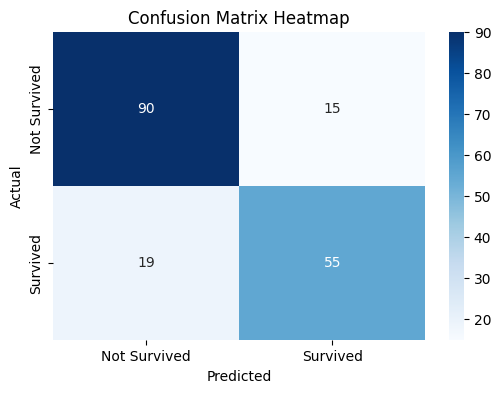

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


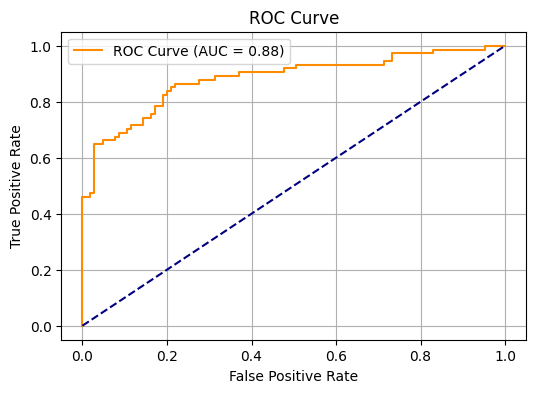

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
